# Application: Estimating RLCT

We will now look at a method to estimate RLCT following Theorem 4 of the WBIC paper: 
```
Watanabe, Sumio. 2013. “A Widely Applicable Bayesian Information Criterion.” Journal of Machine Learning Research: JMLR 14 (Mar): 867–97.
```

Given a model $p(x \mid w)$, prior $\varphi(w)$ and dataset $D_n = \{X_i: i = 1, \dots, n\}$ drawn i.i.d. from a true distribution $q(x)$, the theorem assert that for an empirical negative log-likelihood function $L_n(w) = -\frac{1}{n} \sum_i \log p(X_i \mid w)$ satisfies the following asymptotic expansion in $n$
$$
\mathbb{E}_{w}^{\beta_n}[n L_n(w)] = n L_n(w_0) + \frac{\lambda}{\beta_n} + U_n \sqrt{\frac{\lambda}{\beta_n}} + O_p(1)
$$
where 
  * $\mathbb{E}_w^{\beta}[]$ is expectation over the tempered posterior distribution with inverse temperature $\beta$, 
    $$
    p(w \mid D_n) \propto \varphi(w) \prod_{i} p(X_i \mid w)^\beta = \varphi(w) e^{-\beta n L_n(w)}
    $$
  * the inverse temperature is chosen at $\beta_n = \beta_0 / \log n$ for some constant $\beta_0$. 
  * $w_0$ is global minima of the averaged log-likelihood function $L(w) = -\int q(x) \log p(x \mid w) dx$. 
  * $\lambda$ is the learning coefficient or the RLCT of the zero set of $L(w) - L(w_0)$. 

Hence, for large enough $n$, we expect linear regression for a set of points $(1/ \beta, \mathbb{E}_{w}^\beta[n L_n(w)])$ would result with intercept and slope that could estimate $\lambda$. 

Intuitively, having higher temperature (lower $\beta$) changes the scale of the probability mass around the optimal parameter set $W_0$, or put differently, the region of high probability which concentrates near $W_0$ becomes larger as temperature is raised. The higher the temperature, the more we accept "far away" subpar solution included during Bayesian averaging, i.e. the larger the volume of high likelihood region. The the model is regular, this change in volume scale as the dimension $d$ of the parameter space. But in singular models, this is instead controlled by the RLCT $2 * \lambda$. By observing the tempered posterior average of $nL_n(w)$ at a range of temperature, we probing this scaling relation. 

In [220]:
def linspaced_itemps_by_n(n, num_itemps):
    """
    Returns a 1D numpy array of length `num_itemps` that contains `num_itemps`
    evenly spaced inverse temperatures between the values calculated from the
    formula 1/log(n) * (1 - 1/sqrt(2log(n))) and 1/log(n) * (1 + 1/sqrt(2ln(n))).
    The formula is used in the context of simulating the behavior of a physical
    system at different temperatures using the Metropolis-Hastings algorithm.
    """
    return np.linspace(
        1 / np.log(n) * (1 - 1 / np.sqrt(2 * np.log(n))),
        1 / np.log(n) * (1 + 1 / np.sqrt(2 * np.log(n))),
        num_itemps,
    )


/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/3839609380.py:16: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)


Sampling from temperature: 6.088816165202249


sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 12827.09it/s, 3 steps of size 9.90e-01. acc. prob=0.92]
/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/3839609380.py:16: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)


Sampling from temperature: 4.980322487257292


sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 11632.40it/s, 3 steps of size 1.27e+00. acc. prob=0.90]
/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/3839609380.py:16: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)


Sampling from temperature: 4.213278117685207


sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 11943.47it/s, 3 steps of size 1.25e+00. acc. prob=0.90]
/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/3839609380.py:16: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)


Sampling from temperature: 3.650973441801934


sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 12889.78it/s, 3 steps of size 1.06e+00. acc. prob=0.91]
/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/3839609380.py:16: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)


Sampling from temperature: 3.221086760617032


sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 13088.79it/s, 3 steps of size 1.23e+00. acc. prob=0.89]
/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/3839609380.py:16: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)


Sampling from temperature: 2.881770475422528


sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 13069.84it/s, 3 steps of size 1.07e+00. acc. prob=0.90]


R^2=0.9984281229950037


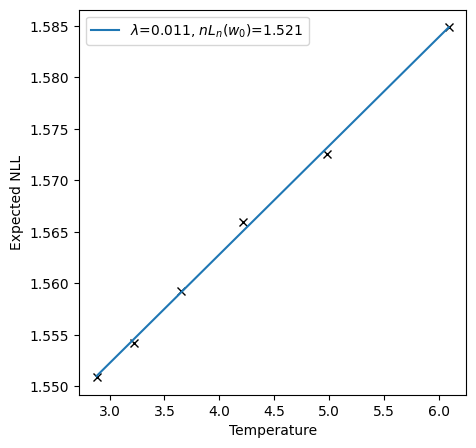

In [221]:

def model(x, y, k, itemp=1.0):
    a = numpyro.sample("a", dist.Normal(0, 1))
    mu = jnp.power(a, k) * x
    with numpyro.plate("data", len(y)):
        numpyro.sample("y", dist.Normal(mu, 1.0 / jnp.sqrt(itemp)), obs=y)

def loglikelihood(a, x, y, k):
    mu = jnp.power(a, k) * x
    return dist.Normal(mu, scale=1.0).log_prob(y)

def generate_data(a_true, k, n, xmin, xmax, rng_key):
    rng_key, sub_rng_key = jax.random.split(rng_key)
    x = jax.random.uniform(sub_rng_key, (n,), minval=xmin, maxval=xmax)
    y = jnp.power(a_true, k) * x + jax.random.normal(rng_key, (n,))
    return x, y        


a_true = 2.00
k = 1
n = 50
xmin = -5
xmax = 5
rng_key = jax.random.PRNGKey(32)

x, y = generate_data(a_true, k, n, xmin, xmax, rng_key)


itemps = linspaced_itemps_by_n(n, num_itemps=6)
enlls = []
for itemp in itemps:
    print(f"Sampling from temperature: {1 / itemp}")
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)
    mcmc.run(rng_key, x, y, k, itemp=itemp)
    samples = mcmc.get_samples()
    num_mcmc_samples = len(samples[list(samples.keys())[0]])
    nlls = []
    for i in range(num_mcmc_samples):
        nlls.append(-loglikelihood(samples['a'][i], x, y, k))
    enlls.append(np.mean(nlls))
    
    
fig, ax = plt.subplots(figsize=(5,5))

slope, intercept, r_val, _, _ = scipy.stats.linregress(1 / itemps, enlls)
ax.plot(1/itemps, enlls, "kx")
ax.plot(1/itemps, 1/itemps * slope + intercept, label=f"$\lambda$={slope:.3f}, $nL_n(w_0)$={intercept:.3f}")
print(f"R^2={r_val**2}")

ax.legend()
ax.set_xlabel("Temperature")
ax.set_ylabel("Expected NLL");


In [229]:
def model(x, y, itemp=1.0):
    a = numpyro.sample("a", dist.Normal(0, 10.0))
    b = numpyro.sample("b", dist.Normal(0, 10.0))
    
    mu = a * jnp.tanh(b * x)
    with numpyro.plate("data", len(y)):
        numpyro.sample("y", dist.Normal(mu, 0.1 / jnp.sqrt(itemp)), obs=y)

def loglikelihood(a, b, x, y):
    mu = a * jnp.tanh(b * x)
    return dist.Normal(mu, scale=1.0).log_prob(y)

def generate_data(a_true, b_true, n, xmin, xmax, rng_key):
    rng_key, sub_rng_key = jax.random.split(rng_key)
    x = jax.random.uniform(sub_rng_key, (n,), minval=xmin, maxval=xmax)
    y = a_true * jnp.tanh(b_true * x) + jax.random.normal(rng_key, (n,))
    return x, y        

a_true = 1.00
b_true = 1.00
n = 500
xmin = -2
xmax = 2
rng_key = jax.random.PRNGKey(35)

x, y = generate_data(a_true, b_true, n, xmin, xmax, rng_key)


itemps = linspaced_itemps_by_n(n, num_itemps=6)
enlls = []
for itemp in itemps:
    print(f"Sampling from temperature: {1 / itemp}")
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)
    mcmc.run(rng_key, x, y, itemp=itemp)
    samples = mcmc.get_samples()
    nlls = []
    num_mcmc_samples = len(samples[list(samples.keys())[0]])
    for i in range(num_mcmc_samples):
        nlls.append(-loglikelihood(samples['a'][i], samples['b'][i], x, y))
    enlls.append(np.mean(nlls))
    
    
fig, ax = plt.subplots(figsize=(5,5))

slope, intercept, r_val, _, _ = scipy.stats.linregress(1 / itemps, enlls)
ax.plot(1/itemps, enlls, "kx")
ax.plot(1/itemps, 1/itemps * slope + intercept, label=f"$\lambda$={slope:.3f}, $nL_n(w_0)$={intercept:.3f}")
print(f"R^2={r_val**2}")

ax.legend()
ax.set_xlabel("Temperature")
ax.set_ylabel("Expected NLL");


/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/4267103289.py:34: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4, thinning=4)


Sampling from temperature: 8.675342639545496


sample: 100%|██████████████████| 2500/2500 [00:00<00:00, 10570.78it/s, 15 steps of size 2.51e-01. acc. prob=0.94]


KeyboardInterrupt: 

# We can now do any posterior expectation!
$B_g(n), G_g(n), WAIC, WBIC ... $

In [ ]:
# dimension of `loglike_array` in all the following functions are 
# (num data samples X, num mcmc sampled parameters w)
def compute_bayesian_loss(loglike_array):
    num_mcmc_samples = loglike_array.shape[1]
    result = -np.mean(logsumexp(loglike_array, b=1 / num_mcmc_samples, axis=1))
    return result


def compute_gibbs_loss(loglike_array):
    gerrs = np.mean(loglike_array, axis=0)
    gg = np.mean(gerrs)
    return -gg


def compute_waic(loglike_array):
    func_var = compute_functional_variance(loglike_array)
    bayes_train_loss = compute_bayesian_loss(loglike_array)
    return bayes_train_loss + func_var


def compute_wbic(tempered_loglike_array):
    return -np.mean(np.sum(tempered_loglike_array, axis=0))



# Application: Toy Model of Superposition

- Visualisation: 
 - Structure of the clumps in tSNE. 
 - 
 
 
Would like to write version with `plotly` or `bokeh` to visualise individual polygons in MCMC samples. 

In [ ]:
def count_convhull_vertices(W):
    hull = ConvexHull(W.T)
    return len(hull.vertices)


def plot_polygon(W, ax=None, hull_alpha=0.3): # works for 2D polygon only. 
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    # Normalize a copy of the vectors for angle calculations
    W_normalized = W / np.linalg.norm(W, axis=0)

    # Compute angles from the x-axis for each vector
    angles = np.arctan2(W_normalized[1, :], W_normalized[0, :])

    # Sort the columns of W by angles
    W_sorted = W[:, np.argsort(angles)]

    # Plot the origin
    ax.scatter(0, 0, color="red")

    # Plot the vectors
    for i in range(W_sorted.shape[1]):
        ax.quiver(
            0, 0, W_sorted[0, i], W_sorted[1, i], angles="xy", scale_units="xy", scale=1
        )

    # Connect the vectors to form a polygon
    polygon = np.column_stack((W_sorted, W_sorted[:, 0]))
    ax.plot(polygon[0, :], polygon[1, :], alpha=0.5)

    # Plot the convex hull
    hull = ConvexHull(W.T)
    vs = list(hull.vertices) + [hull.vertices[0]]
    ax.plot(W[0, vs], W[1, vs], "r--", alpha=hull_alpha)

    # Set the aspect ratio of the plot to equal to ensure that angles are displayed correctly
    ax.set_aspect("equal", adjustable="box")
    return ax


def normalize_W(W): # This removes the S_n and O(2) symmetries. 
    # Compute the magnitudes of the columns
    magnitudes = np.linalg.norm(W, axis=0)

    # Identify the index of the column with the largest magnitude
    idx_max_magnitude = np.argmax(magnitudes)

    # Compute the angle between the largest column and the x-axis
    angle = np.arctan2(W[1, idx_max_magnitude], W[0, idx_max_magnitude])

    # Create a rotation matrix (clockwise rotation)
    R = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

    # Rotate the matrix so that the longest vector line up with x-axis
    W_rotated = np.dot(R, W)

    # Sort the columns according to their angles from the x-axis
    W_normalised = W_rotated / magnitudes
    angles = np.arctan2(W_normalised[1], W_normalised[0])

    return W_rotated[:, np.argsort(angles)]


def compute_l2_distance(W1, W2, m=2, normalise_func=normalize_W):
    # Normalize the matrices
    W1_normalized = normalise_func(W1.reshape(m, -1))
    W2_normalized = normalise_func(W2.reshape(m, -1))
    # Compute the L2 distance between the normalized matrices
    return np.linalg.norm(W1_normalized - W2_normalized)

@jax.jit
def toymodel_forward(W, b, X):
    # Compute ReLU(W^T W x + b), where x is now a row of X
    mu = jnp.matmul(jnp.transpose(W), jnp.matmul(W, jnp.transpose(X))) + b
    mu = jax.nn.relu(mu)
    return jnp.transpose(mu)

@jax.jit
def toymodel_log_likelihood(W, b, X, sigma_obs=1.0):
    mu = toymodel_forward(W, b, X)
    return dist.Normal(mu, sigma_obs).log_prob(X)



In [ ]:
Ws = posterior_samples["W"]
num_mcmc_samples = len(Ws)
bs = posterior_samples["b"] # TODO: handle cases where --no_bias is set. 


# - Convex hull configurations
convhull_vertices_nums = [count_convhull_vertices(W) for W in Ws]
convhull_vertices_tally = make_tally(convhull_vertices_nums)

print(f"Num MCMC samples: {num_mcmc_samples}")
num_unique_convexhull = len(set(convhull_vertices_nums))

print(f"Distinct convex hulls (num={num_unique_convexhull}): {sorted(set(convhull_vertices_nums))}")

# - Frobenius norms
frobenius_norms = np.array([np.sum(W**2) for W in Ws])

# - Clustering
vecs = np.array([W.flatten() for W in Ws])

metric = lambda W1, W2: compute_l2_distance(W1, W2, m=m, normalise_func=normalize_W)
kmedoids = KMedoids(n_clusters=n_cluster, metric=metric).fit(vecs)
cluster_centers = kmedoids.cluster_centers_


# t-SNE for visualization
logger.info("Running tSNE...")
tsne = TSNE(n_components=2, metric=metric)
vecs_2d = tsne.fit_transform(vecs)